In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

EPOCHS = 5
#wczytaj zbiór mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-01-22 11:37:44.141816: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 11:37:44.194532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 11:37:44.930215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#znormalizuj zbiór treningowy i testestowy
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
#dodaj szum w następujący sposób. Można zmienić parametr równy 0.2, żeby dodać więcej szumu.

x_train_noise = x_train.copy()
x_train_noise[:,7:17,7:17] = 0
#od 10 do 18 wiersza i kolumny wstawiamy zera - czyli wyczerniamy obraz

x_test_noise = x_test.copy()
x_test_noise[:,7:17,17:17] = 0


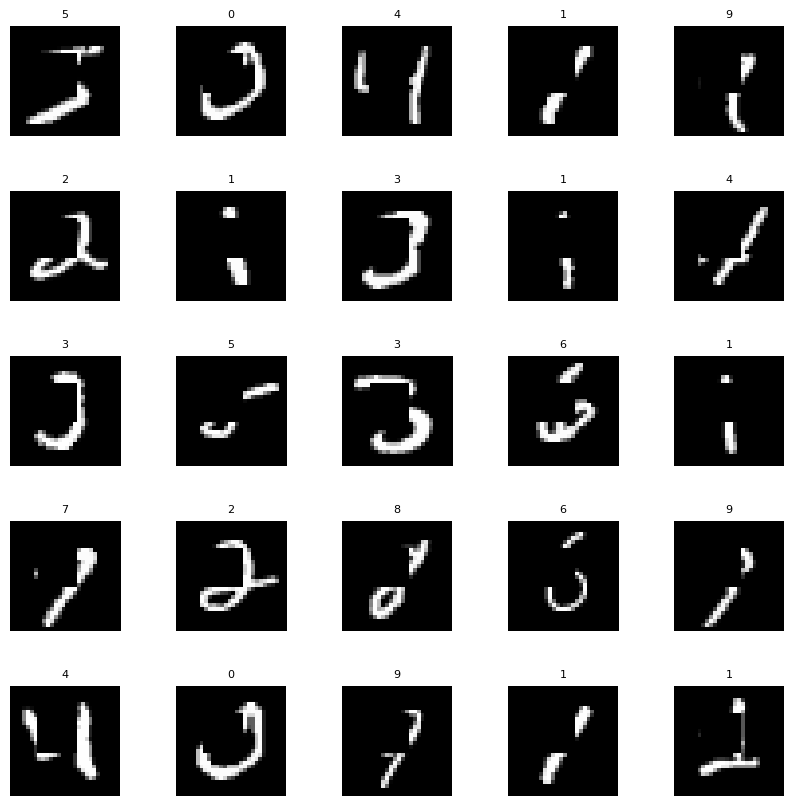

In [4]:
#wyświetl 25 elementów zbioru treningowego z dodanym szumem
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1) #numeracja musi być od 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.imshow(x_train_noise[i], cmap='gray')
    plt.title(str(y_train[i]), fontsize = 8)
    plt.axis("off")

In [5]:
#zbuduj autoenkoder, wytrenuj go i wyświetl wyniki predykcji jak w poprzednim zadaniu 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

model = Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(784, activation = 'sigmoid'))
model.add(Reshape((28,28)))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

2024-01-22 11:37:47.743894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-22 11:37:47.743958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2024-01-22 11:37:47.743973: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2024-01-22 11:37:47.744150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2024-01-22 11:37:47.744201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2024-01-22 11:37:47.744209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 32)                352       
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 51,674
Trainable params: 51,674
Non-traina

In [6]:
history = model.fit(x_train_noise, x_train, epochs = EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2048
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1595
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1525
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1487
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1462


In [7]:
hist = pd.DataFrame(history.history)

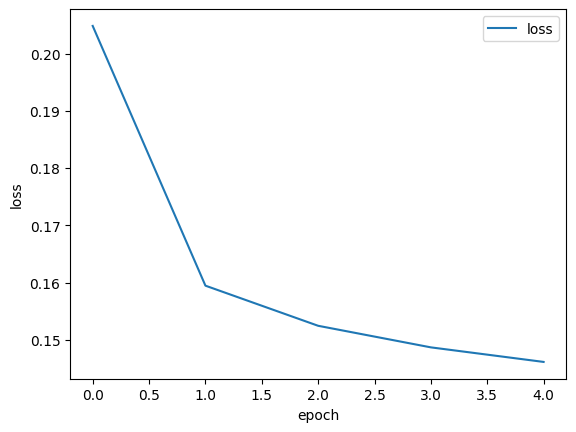

In [8]:
plt.plot(hist.loss, label = "loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [9]:
y_pred = model.predict(x_test_noise)

313/313 [==============================] - 1s 2ms/step


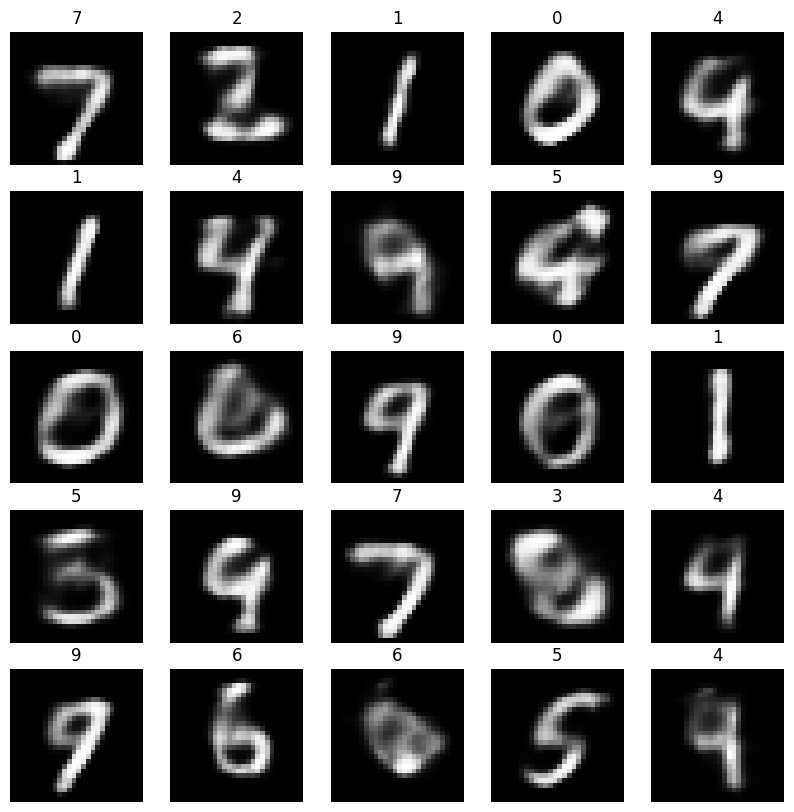

In [10]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(y_pred[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

a czemu te obrazki są takie zaszumione, jakby on nie był pewny?
a bo ostanią funkcją aktwacji jest sigmoid, czyli: ma wartość 1 gdy sieć jest bardzo pewna, ma wartośćć 0 gdy wartość wejściowa jest ujemna i jest taki bardzo wąski przedział, kiedy sigmoid nie przyjmuje 0 ani 1 tylko jakieś małe wartości pomiędzy i cała ta niepewność wynika właśnie z tych wartości wejściowych znajdujących się pomiędzy - on wtedy wypluwa jakieś takie niepewne coś i powstaje taki szum